<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Birds-Classifier" data-toc-modified-id="Birds-Classifier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Birds Classifier</a></span><ul class="toc-item"><li><span><a href="#Load-Training-Set" data-toc-modified-id="Load-Training-Set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Training Set</a></span></li><li><span><a href="#Loading-Validation-Set" data-toc-modified-id="Loading-Validation-Set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading Validation Set</a></span></li></ul></li></ul></div>

## Birds Classifier

In [117]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import os
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

In [118]:
N_SPECIES = 20

### Load Training Set

In [178]:
train_path = 'data/200_species_train'

In [179]:
def load_dataset(data_path, max_species=100, shuffled=True, grayscale=False, flatten=False): 
    data_images = []
    data_labels = []
    for num_species, specie in enumerate(os.listdir(data_path)):
        images_path = os.path.join(data_path,specie)
        for i in os.listdir(images_path):
            image_path = os.path.join(images_path,i)
            im = Image.open(image_path)
            if grayscale:
                im = im.convert("L")
            arr = np.asarray(im)
            if flatten:
                arr = arr.flatten()
            data_images.append(arr)
            data_labels.append(specie)
        if num_species == max_species-1:
            break
    data_images = np.array(data_images)
    data_labels = np.array(data_labels)
    
    if shuffled:
        X, y = shuffle(data_images, data_labels, random_state=42)
    return X, y

We need to shuffle so we won't have the species in order

In [180]:
X_train, y_train = load_dataset(train_path, max_species=N_SPECIES)

In [181]:
X_train.shape

(2799, 224, 224, 3)

In [123]:
y_train[:10]

array(['AMERICAN KESTREL', 'AMERICAN COOT', 'BARN OWL', 'AMERICAN PIPIT',
       'ANNAS HUMMINGBIRD', 'ANHINGA', 'BALTIMORE ORIOLE',
       'ARARIPE MANAKIN', 'AMERICAN REDSTART', 'AMERICAN KESTREL'],
      dtype='<U20')

In [124]:
y_train.size

2799

In [125]:
X_train[:3]

array([[[[ 80,  75,  71],
         [ 80,  75,  71],
         [ 80,  75,  71],
         ...,
         [ 50,  49,  44],
         [ 49,  48,  43],
         [ 49,  48,  43]],

        [[ 81,  76,  72],
         [ 82,  77,  73],
         [ 83,  78,  74],
         ...,
         [ 53,  53,  45],
         [ 52,  51,  46],
         [ 52,  52,  44]],

        [[ 84,  79,  73],
         [ 85,  80,  74],
         [ 87,  82,  76],
         ...,
         [ 55,  55,  45],
         [ 55,  55,  47],
         [ 55,  55,  45]],

        ...,

        [[143, 139, 110],
         [142, 138, 109],
         [141, 137, 108],
         ...,
         [127, 135,  94],
         [126, 134,  93],
         [126, 135,  92]],

        [[143, 140, 109],
         [141, 138, 107],
         [141, 138, 107],
         ...,
         [125, 136,  94],
         [126, 134,  93],
         [127, 135,  94]],

        [[143, 140, 109],
         [142, 139, 108],
         [141, 138, 107],
         ...,
         [126, 137,  97],
        

### Loading Validation Set

Each Image is transformed to Grayscale

In [163]:
validation_path = 'data/200_species_valid/'

In [164]:
X_val, y_val = load_dataset(validation_path, max_species=N_SPECIES)

In [165]:
X_val.shape

(100, 224, 224, 3)

In [166]:
X_val[:3]

array([[[[ 64,  78,  53],
         [ 65,  79,  54],
         [ 67,  81,  55],
         ...,
         [133, 181,  59],
         [134, 184,  59],
         [136, 186,  61]],

        [[ 63,  77,  52],
         [ 65,  79,  54],
         [ 67,  81,  55],
         ...,
         [136, 184,  62],
         [135, 185,  60],
         [137, 187,  62]],

        [[ 63,  77,  52],
         [ 65,  79,  54],
         [ 68,  82,  56],
         ...,
         [139, 187,  65],
         [137, 187,  62],
         [138, 188,  63]],

        ...,

        [[ 84,  86,  72],
         [ 85,  87,  73],
         [ 85,  89,  74],
         ...,
         [ 79,  91,  79],
         [ 79,  91,  79],
         [ 79,  91,  79]],

        [[ 82,  86,  71],
         [ 84,  88,  73],
         [ 85,  89,  74],
         ...,
         [ 79,  91,  79],
         [ 78,  92,  79],
         [ 78,  92,  79]],

        [[ 81,  85,  70],
         [ 83,  87,  72],
         [ 85,  89,  74],
         ...,
         [ 79,  91,  79],
        

In [167]:
y_val.size

100

In [168]:
y_val[:10]

array(['BANANAQUIT', 'ANHINGA', 'BALD EAGLE', 'AMERICAN REDSTART',
       'AMERICAN PIPIT', 'AMERICAN KESTREL', 'AMERICAN BITTERN',
       'BANANAQUIT', 'ALEXANDRINE PARAKEET', 'AFRICAN FIREFINCH'],
      dtype='<U20')

In [169]:
rows_train = X_train.shape[0]
rows_val = X_val.shape[0]

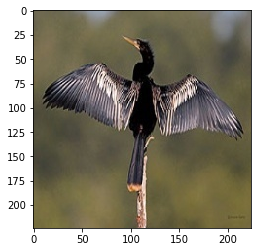

In [170]:
plt.imshow(X_train[5])
plt.show()

In [171]:
test_path = 'data/200_species_test/'

In [172]:
X_test, y_test = load_dataset(test_path, max_species=N_SPECIES)

In [184]:
np.unique(y_train)

array(['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET',
       'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT',
       'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT',
       'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD',
       'ARARIPE MANAKIN', 'BALD EAGLE', 'BALTIMORE ORIOLE', 'BANANAQUIT',
       'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW'], dtype='<U20')

In [185]:
np.unique(y_val)

array(['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET',
       'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT',
       'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT',
       'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD',
       'ARARIPE MANAKIN', 'BALD EAGLE', 'BALTIMORE ORIOLE', 'BANANAQUIT',
       'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW'], dtype='<U20')

In [186]:
np.unique(y_test)

array(['AFRICAN FIREFINCH', 'ALBATROSS', 'ALEXANDRINE PARAKEET',
       'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT',
       'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT',
       'AMERICAN REDSTART', 'ANHINGA', 'ANNAS HUMMINGBIRD', 'ANTBIRD',
       'ARARIPE MANAKIN', 'BALD EAGLE', 'BALTIMORE ORIOLE', 'BANANAQUIT',
       'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW'], dtype='<U20')

In [187]:
X_test.shape, y_test.shape

((100, 224, 224, 3), (100,))

In [188]:
enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

In [191]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [192]:
y_train.shape

(2799, 20)

In [193]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

In [194]:
y_val.shape

(100, 20)

In [195]:
y_val[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

**Augmentation**

In [198]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [199]:
X_train.shape

(2799, 224, 224, 3)

In [200]:
train_datagen.fit(X_train)

In [28]:
X_train.shape

(2799, 224, 224, 3)

In [201]:
val_datagen.fit(X_val)

In [202]:
X_val.shape

(100, 224, 224, 3)

In [203]:
test_datagen.fit(X_test)

**Transfer learning using Resnet50 trained on Imagnet**

In [204]:
resnet = ResNet50(input_shape=X_train.shape[1:], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [205]:
flat = Flatten()(resnet.output)
out = Dense(N_SPECIES, activation='softmax')(flat)
model = Model(inputs=resnet.input, outputs=out)
model.summary()
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [206]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [231]:
history = model.fit(X_train, y_train, batch_size=32,
          validation_data=(X_val, y_val), epochs=1, verbose=1,use_multiprocessing=True)

Train on 2799 samples, validate on 100 samples
2799/2799 [==============================] - 1597s 571ms/sample - loss: 0.2988 - accuracy: 0.9843 - val_loss: 1.4968 - val_accuracy: 0.9200


In [232]:
y_pred_val = model.predict(X_val)

In [233]:
y_val.argmax(axis=1).shape

(100,)

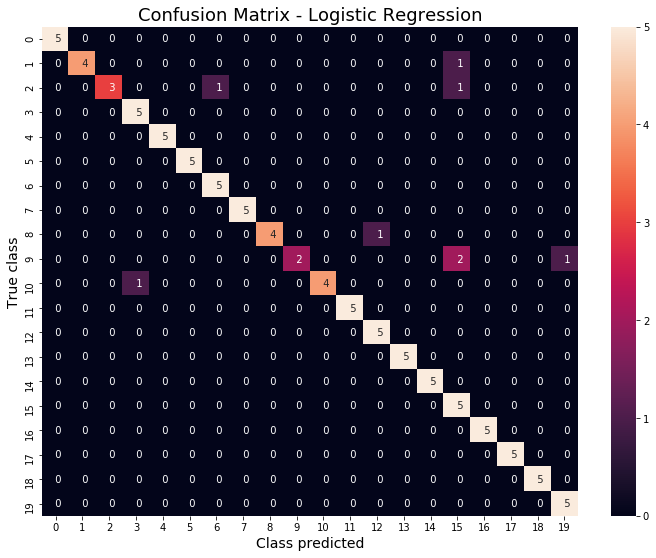

In [234]:
plt.figure(figsize=(12,9))
sns.heatmap(confusion_matrix(y_val.argmax(axis=1),y_pred_val.argmax(axis=1)), annot=True, fmt="3d")
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.xlabel('Class predicted', fontsize=14)
plt.ylabel('True class', fontsize=14)
plt.show()

3

0 3
1 31
2 40
3 66
4 73


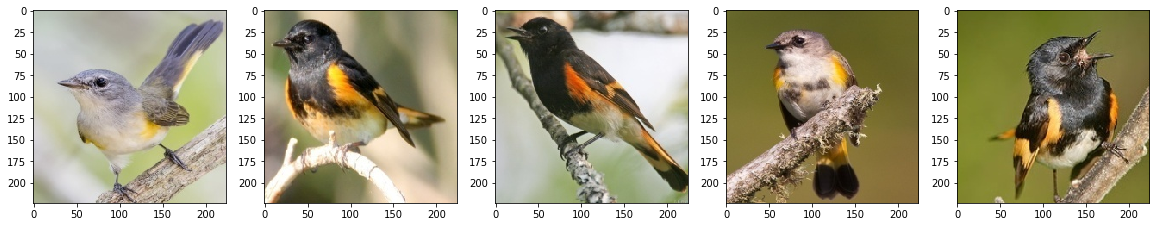

In [263]:
inds_class_9 = np.where(y_val[:,9])[0]
f, ax = plt.subplots(1,5,figsize=(20,4))
for i,j in enumerate(inds_class_9):
    print(i,j)
    ax[i].imshow(X_val[j])

0 3
1 31
2 40
3 66
4 73


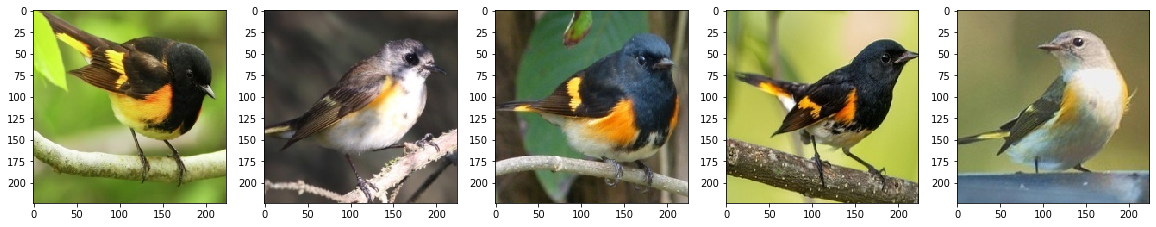

In [264]:
inds_class_9 = np.where(y_test[:,9])[0]
f, ax = plt.subplots(1,5,figsize=(20,4))
for i,j in enumerate(inds_class_9):
    print(i,j)
    ax[i].imshow(X_test[j])

0 16
1 17
2 55
3 70
4 76


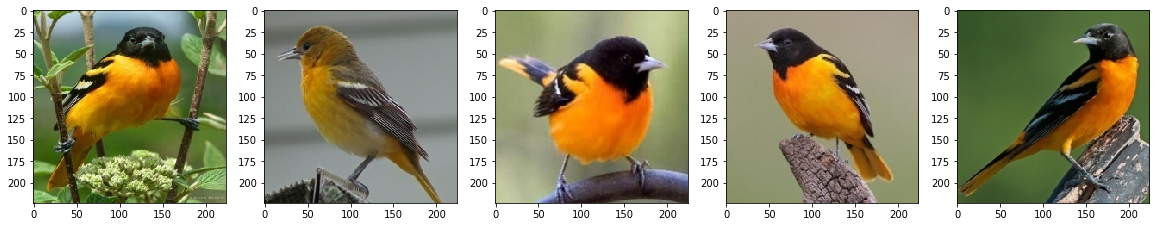

In [265]:
inds_class_9 = np.where(y_val[:,15])[0]
f, ax = plt.subplots(1,5,figsize=(20,4))
for i,j in enumerate(inds_class_9):
    print(i,j)
    ax[i].imshow(X_val[j])

0 16
1 17
2 55
3 70
4 76


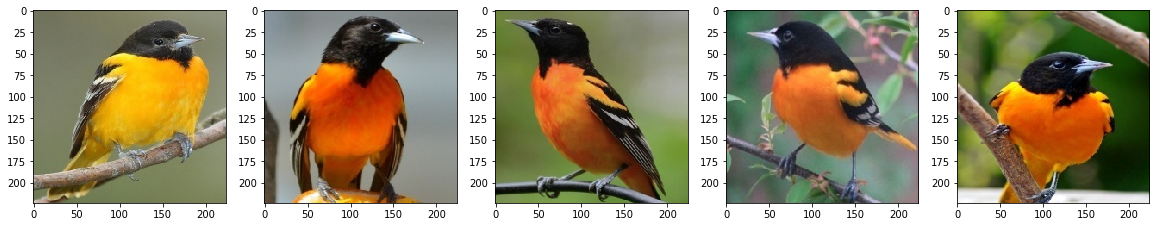

In [268]:
inds_class_9 = np.where(y_test[:,15])[0]
f, ax = plt.subplots(1,5,figsize=(20,4))
for i,j in enumerate(inds_class_9):
    print(i,j)
    ax[i].imshow(X_test[j])

In [235]:
print(classification_report(y_val.argmax(axis=1),y_pred_val.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       1.00      0.60      0.75         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       1.00      0.80      0.89         5
           9       1.00      0.40      0.57         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       0.83      1.00      0.91         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.56      1.00      0.71         5
          16       1.00      1.00      1.00         5
          17       1.00    

In [239]:
y_pred_test = model.predict(X_test)
y_test.argmax(axis=1).shape

(100,)

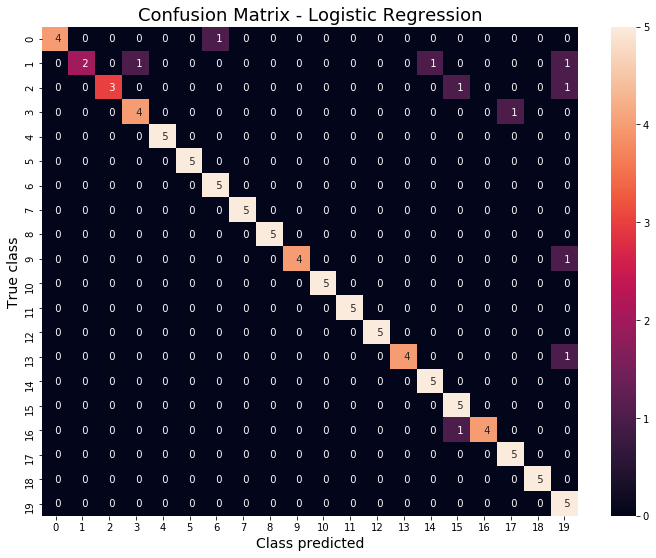

In [240]:
plt.figure(figsize=(12,9))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)), annot=True, fmt="3d")
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.xlabel('Class predicted', fontsize=14)
plt.ylabel('True class', fontsize=14)
plt.show()

In [241]:
print(classification_report(y_test.argmax(axis=1),y_pred_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.40      0.57         5
           2       1.00      0.60      0.75         5
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      0.80      0.89         5
          14       0.83      1.00      0.91         5
          15       0.71      1.00      0.83         5
          16       1.00      0.80      0.89         5
          17       0.83    

In [270]:
y_pred_train = model.predict(X_train)
y_train.argmax(axis=1).shape

(2799,)

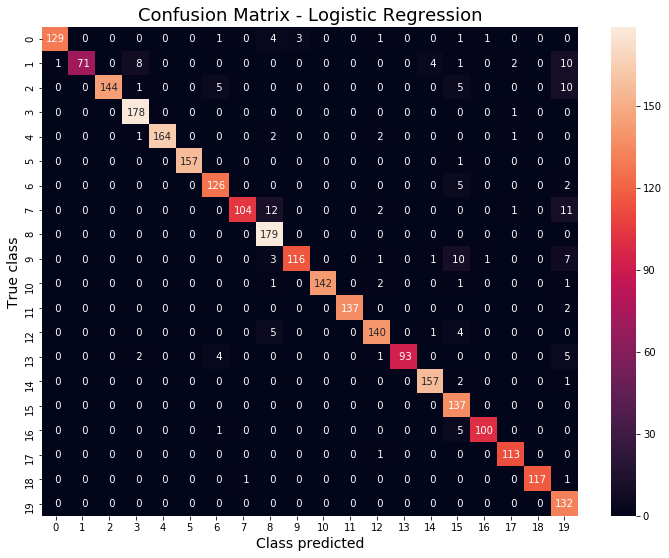

In [272]:
plt.figure(figsize=(12,9))
sns.heatmap(confusion_matrix(y_train.argmax(axis=1),y_pred_train.argmax(axis=1)), annot=True, fmt="3d")
plt.title('Confusion Matrix - Logistic Regression', fontsize=18)
plt.xlabel('Class predicted', fontsize=14)
plt.ylabel('True class', fontsize=14)
plt.show()